<a href="https://colab.research.google.com/github/yushendye/AerialInspection/blob/main/TT_PLA_Dataset_PP_YOLO_24_Spet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/R3ab/ttpla_dataset.git

Cloning into 'ttpla_dataset'...
remote: Enumerating objects: 209, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (192/192), done.
remote: Total 209 (delta 77), reused 78 (delta 17), pack-reused 0
Receiving objects: 100% (209/209), 49.88 MiB | 14.35 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [3]:
!cp /content/drive/MyDrive/data_original_size_v1.zip /content/

In [4]:
!sudo apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [5]:
!7z e /content/data_original_size_v1.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 4510541945 bytes (4302 MiB)

Extracting archive: /content/data_original_size_v1.zip
 10% 256 Open              30% 768 Open              51% 1280 Open              
ERRORS:
Headers Error

--
Path = /content/data_original_size_v1.zip
Type = zip
ERRORS:
Headers Error
Physical Size = 4510541945
64-bit = +

  0%      0% 5 - data_original_size_v1/data_original_size/04_585.jpg                                                              0% 9 - data_original_size_v1/data_original

In [6]:
!mkdir /content/TTPLA_Images/
!mv *.jpg /content/TTPLA_Images/
!mv *.json /content/TTPLA_Images/

In [7]:
!rmdir /content/sized_data
%cd /content/
!python /content/ttpla_dataset/scripts/resize_image_and_annotation-final.py -t /content/TTPLA_Images

rmdir: failed to remove '/content/sized_data': No such file or directory
/content
/content/TTPLA_Images/16_4005.json 3840 2160  Resizing
/content/TTPLA_Images/41_01611.json 3840 2160  Resizing
/content/TTPLA_Images/52_00171.json 3840 2160  Resizing
/content/TTPLA_Images/44_00081.json 3840 2160  Resizing
/content/TTPLA_Images/27_00881.json 3840 2160  Resizing
/content/TTPLA_Images/31_00948.json 3840 2160  Resizing
/content/TTPLA_Images/58_00496.json 3840 2160  Resizing
/content/TTPLA_Images/63_01256.json 3840 2160  Resizing
/content/TTPLA_Images/41_00641.json 3840 2160  Resizing
/content/TTPLA_Images/58_00231.json 3840 2160  Resizing
/content/TTPLA_Images/31_00110.json 3840 2160  Resizing
/content/TTPLA_Images/6_00015.json 3840 2160  Resizing
/content/TTPLA_Images/41_00291.json 3840 2160  Resizing
/content/TTPLA_Images/54_00216.json 3840 2160  Resizing
/content/TTPLA_Images/42_00581.json 3840 2160  Resizing
/content/TTPLA_Images/13_00716.json 3840 2160  Resizing
/content/TTPLA_Images/10

In [ ]:
%cd /content/
!rm -rf /content/newjsons
!python /content/ttpla_dataset/scripts/remove_void.py -t /content/sized_data

/content
remove 1 voids from 39_00011.json and saving the new file to newjsons/39_00011.json
remove 1 voids from 44_00711.json and saving the new file to newjsons/44_00711.json
remove 8 voids from 48_02036.json and saving the new file to newjsons/48_02036.json
remove 38 voids from 90_7050.json and saving the new file to newjsons/90_7050.json
remove 19 voids from 22_01901.json and saving the new file to newjsons/22_01901.json
remove 2 voids from 39_00201.json and saving the new file to newjsons/39_00201.json
remove 12 voids from 66_00136.json and saving the new file to newjsons/66_00136.json
remove 4 voids from 42_00471.json and saving the new file to newjsons/42_00471.json
remove 21 voids from 25_00516.json and saving the new file to newjsons/25_00516.json
remove 4 voids from 54_00351.json and saving the new file to newjsons/54_00351.json
remove 1 voids from 44_00581.json and saving the new file to newjsons/44_00581.json
remove 20 voids from 33_7440.json and saving the new file to newj

In [ ]:
%cd /content/ttpla_dataset/splitting_dataset_txt/
!python /content/ttpla_dataset/scripts/split_jsons.py -t /content/newjsons/

/content/ttpla_dataset/splitting_dataset_txt
905 220 109 1242 1234


In [ ]:
%cd /content/
!pip install labelme
!python /content/ttpla_dataset/scripts/labelme2coco_2.py /content/newjsons/

/content
     |████████████████████████████████| 1.5 MB 5.4 MB/s 
     |████████████████████████████████| 7.7 MB 12.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 68.3 MB 37 kB/s 
     |████████████████████████████████| 317 kB 32.4 MB/s 
  Created wheel for labelme: filename=labelme-4.5.10-py3-none-any.whl size=1465507 sha256=7783338bb3502e4f5bd69e786250d1b72c98925afffc99fa13e1666284f12abf
  Stored in directory: /root/.cache/pip/wheels/25/9f/92/6c1b4e3a564cd1950878af4ebb552bbb04b6f86111b747af13
  Created wheel for imgviz: filename=imgviz-1.2.6-py3-none-any.whl size=7674115 sha256=8d20f3365806089a8ee7af5e45b21b2ef6f44af936db1449c6d1267f860755ed
  Stored in directory: /root/.cache/pip/wheels/e6/64/f9/a28eca2133ece5f072f51282577f2f9b7d6d0492eb3d2104dd
Successfully built labelme imgviz
1242
save coco json
{'cable': 0, 'tower_lattice': 1, 'tower_tucohy': 2, 'tower_w

In [ ]:
#train jsons
!python /content/ttpla_dataset/scripts/labelme2coco_2.py /content/ttpla_dataset/splitting_dataset_txt/splitting_jsons/train_jsons

905
save coco json
{'cable': 0, 'tower_lattice': 1, 'tower_tucohy': 2, 'tower_wooden': 3}
['cable', 'tower_lattice', 'tower_tucohy', 'tower_wooden']
Label with ids =  {'cable': 0, 'tower_lattice': 1, 'tower_tucohy': 2, 'tower_wooden': 3}
trainval.json


In [ ]:
#test json
!python /content/ttpla_dataset/scripts/labelme2coco_2.py /content/ttpla_dataset/splitting_dataset_txt/splitting_jsons/test_jsons

220
save coco json
{'cable': 0, 'tower_lattice': 1, 'tower_tucohy': 2, 'tower_wooden': 3}
['cable', 'tower_lattice', 'tower_tucohy', 'tower_wooden']
Label with ids =  {'cable': 0, 'tower_lattice': 1, 'tower_tucohy': 2, 'tower_wooden': 3}
trainval.json


In [ ]:
#valid json
!python /content/ttpla_dataset/scripts/labelme2coco_2.py /content/ttpla_dataset/splitting_dataset_txt/splitting_jsons/val_jsons

109
save coco json
{'cable': 0, 'tower_lattice': 1, 'tower_tucohy': 2, 'tower_wooden': 3}
['cable', 'tower_lattice', 'tower_tucohy', 'tower_wooden']
Label with ids =  {'cable': 0, 'tower_lattice': 1, 'tower_tucohy': 2, 'tower_wooden': 3}
trainval.json


In [8]:
!python -m pip install paddlepaddle-gpu==2.1.0.post101 -f https://paddlepaddle.org.cn/whl/mkl/stable.html

Looking in links: https://paddlepaddle.org.cn/whl/mkl/stable.html
     |████████████████████████████████| 344.9 MB 14 kB/s 


In [9]:
#exit(0)
import paddle
paddle.utils.run_check()

Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 GPU.
PaddlePaddle works well on 1 GPUs.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.


In [10]:
!python -c "import paddle; print(paddle.__version__)"

2.1.0


In [11]:
!pip install paddledet==2.1.0 -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple
     |████████████████████████████████| 416 kB 1.0 MB/s 
     |████████████████████████████████| 151 kB 12.6 MB/s 
     |████████████████████████████████| 2.7 MB 16.0 MB/s 
     |████████████████████████████████| 1.5 MB 12.8 MB/s 
     |████████████████████████████████| 2.0 MB 15.2 MB/s 
     |████████████████████████████████| 73 kB 1.4 MB/s 
     |████████████████████████████████| 197 kB 26.2 MB/s 
     |████████████████████████████████| 191 kB 25.5 MB/s 
     |████████████████████████████████| 68 kB 5.4 MB/s 
     |████████████████████████████████| 41 kB 581 kB/s 
     |████████████████████████████████| 1.9 MB 13.9 MB/s 
     |████████████████████████████████| 50 kB 4.7 MB/s 
     |████████████████████████████████| 5.3 MB 14.8 MB/s 
     |████████████████████████████████| 98 kB 6.3 MB/s 
     |████████████████████████████████| 636 kB 10.6 MB/s 
     |████████████████████████████████| 496 kB 42.4 MB/s 
     |████████████████████

In [12]:
%cd /content/
!rm -rf /content/PaddleDetection/
!git clone https://github.com/PaddlePaddle/PaddleDetection.git

/content
Cloning into 'PaddleDetection'...
remote: Enumerating objects: 16471, done.
remote: Counting objects: 100% (1697/1697), done.
remote: Compressing objects: 100% (700/700), done.
remote: Total 16471 (delta 1120), reused 1413 (delta 992), pack-reused 14774
Receiving objects: 100% (16471/16471), 141.84 MiB | 26.62 MiB/s, done.
Resolving deltas: 100% (11766/11766), done.


In [13]:
%cd /content/PaddleDetection
!python setup.py install

/content/PaddleDetection
running install
running bdist_egg
running egg_info
creating paddledet.egg-info
writing paddledet.egg-info/PKG-INFO
writing dependency_links to paddledet.egg-info/dependency_links.txt
writing requirements to paddledet.egg-info/requires.txt
writing top-level names to paddledet.egg-info/top_level.txt
writing manifest file 'paddledet.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'paddledet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/ppdet
copying ppdet/optimizer.py -> build/lib/ppdet
copying ppdet/version.py -> build/lib/ppdet
copying ppdet/__init__.py -> build/lib/ppdet
creating build/lib/ppdet/metrics
copying ppdet/metrics/widerface_utils.py -> build/lib/ppdet/metrics
copying ppdet/metrics/munkres.py -> build/lib/ppdet/metrics
copying ppdet/metrics/map_utils.py -> build/lib/ppdet/metrics
copying ppdet/metrics/metr

In [14]:
!pip install -r requirements.txt

In [16]:
!export CUDA_VISIBLE_DEVICES=0
!python /content/PaddleDetection/tools/train.py -c /content/PaddleDetection/configs/ppyolo/ppyolov2_r50vd_dcn_365e_coco.yml -r /content/drive/MyDrive/22_Sept_TTPLA/ppyolov2_r50vd_dcn_365e_coco/407 --eval

/usr/local/lib/python3.7/dist-packages/IPython/utils/module_paths.py:29: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
W0924 09:17:21.694576   575 device_context.cc:404] Please NOTE: device: 0, GPU Compute Capability: 3.7, Driver API Version: 11.2, Runtime API Version: 10.1
W0924 09:17:21.710920   575 device_context.cc:422] device: 0, cuDNN Version: 7.6.
[09/24 09:17:32] ppdet.utils.checkpoint INFO: Finish resuming model weights: /content/drive/MyDrive/22_Sept_TTPLA/ppyolov2_r50vd_dcn_365e_coco/407.pdparams
loading annotations into memory...
Done (t=1.06s)
creating index...
index created!
[09/24 09:17:44] ppdet.engine INFO: Epoch: [408] [  0/131] learning_rate: 0.000020 loss_xy: 0.147059 loss_wh: 0.122488 loss_iou: 0.497703 loss_iou_aware: 0.175194 loss_obj: 1.249153 loss_cls: 0.094056 loss: 2.285653 eta: 6:08:54 

In [18]:
!export CUDA_VISIBLE_DEVICES=0
!python /content/PaddleDetection/tools/eval.py -c /content/PaddleDetection/configs/ppyolo/ppyolov2_r50vd_dcn_365e_coco.yml -o weights=/content/drive/MyDrive/22_Sept_TTPLA/ppyolov2_r50vd_dcn_365e_coco/455.pdparams --classwise

/usr/local/lib/python3.7/dist-packages/IPython/utils/module_paths.py:29: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
W0924 11:25:10.211040  1586 device_context.cc:404] Please NOTE: device: 0, GPU Compute Capability: 3.7, Driver API Version: 11.2, Runtime API Version: 10.1
W0924 11:25:10.231987  1586 device_context.cc:422] device: 0, cuDNN Version: 7.6.
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
[09/24 11:25:17] ppdet.utils.checkpoint INFO: Finish loading model weights: /content/drive/MyDrive/22_Sept_TTPLA/ppyolov2_r50vd_dcn_365e_coco/455.pdparams
[09/24 11:25:18] ppdet.engine INFO: Eval iter: 0
[09/24 11:26:01] ppdet.metrics.metrics INFO: The bbox result is saved to bbox.json.
loading annotations into memory...
Done (t=0.10s)
creating index...
index created!
[09/24 11:26:01] ppdet.metrics.coco_utils INFO: Start evaluate...
Loading and preparing results..

In [20]:
!export CUDA_VISIBLE_DEVICES=0
!python /content/PaddleDetection/tools/eval.py -c /content/PaddleDetection/configs/ppyolo/ppyolov2_r50vd_dcn_365e_coco.yml -o weights=/content/drive/MyDrive/22_Sept_TTPLA/ppyolov2_r50vd_dcn_365e_coco/455.pdparams --classwise

/usr/local/lib/python3.7/dist-packages/IPython/utils/module_paths.py:29: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
W0924 11:26:30.799361  1666 device_context.cc:404] Please NOTE: device: 0, GPU Compute Capability: 3.7, Driver API Version: 11.2, Runtime API Version: 10.1
W0924 11:26:30.806952  1666 device_context.cc:422] device: 0, cuDNN Version: 7.6.
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
[09/24 11:26:36] ppdet.utils.checkpoint INFO: Finish loading model weights: /content/drive/MyDrive/22_Sept_TTPLA/ppyolov2_r50vd_dcn_365e_coco/455.pdparams
[09/24 11:26:37] ppdet.engine INFO: Eval iter: 0
[09/24 11:26:50] ppdet.metrics.metrics INFO: The bbox result is saved to bbox.json.
loading annotations into memory...
Done (t=0.03s)
creating index...
index created!
[09/24 11:26:50] ppdet.metrics.coco_utils INFO: Start evaluate...
Loading and preparing results..

In [36]:
!wget https://upload.wikimedia.org/wikipedia/commons/c/c1/Anchor_tower_of_overhead_power_line.jpg

--2021-09-24 11:37:06--  https://upload.wikimedia.org/wikipedia/commons/c/c1/Anchor_tower_of_overhead_power_line.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2551219 (2.4M) [image/jpeg]
Saving to: ‘Anchor_tower_of_overhead_power_line.jpg’

Anchor_tower_of_ove 100%[===================>]   2.43M  7.46MB/s    in 0.3s    

2021-09-24 11:37:07 (7.46 MB/s) - ‘Anchor_tower_of_overhead_power_line.jpg’ saved [2551219/2551219]



In [51]:
!python tools/infer.py -c configs/ppyolo/ppyolov2_r50vd_dcn_365e_coco.yml -o use_gpu=True weights=/content/drive/MyDrive/22_Sept_TTPLA/ppyolov2_r50vd_dcn_365e_coco/455.pdparams --infer_img=/content/sized_data/04_3420.jpg --draw_threshold=0.5

/usr/local/lib/python3.7/dist-packages/IPython/utils/module_paths.py:29: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
W0924 11:45:17.049587  2237 device_context.cc:404] Please NOTE: device: 0, GPU Compute Capability: 3.7, Driver API Version: 11.2, Runtime API Version: 10.1
W0924 11:45:17.053848  2237 device_context.cc:422] device: 0, cuDNN Version: 7.6.
[09/24 11:45:21] ppdet.utils.checkpoint INFO: Finish loading model weights: /content/drive/MyDrive/22_Sept_TTPLA/ppyolov2_r50vd_dcn_365e_coco/455.pdparams
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
[09/24 11:45:21] ppdet.engine INFO: Detection bbox results save in output/04_3420.jpg


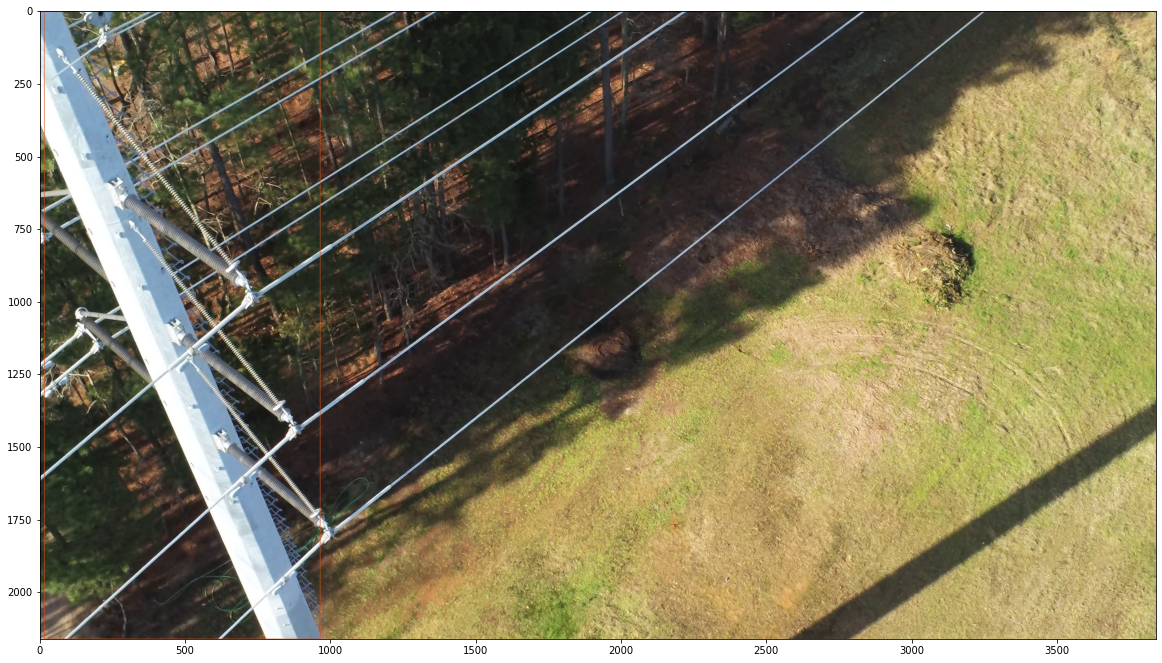

In [48]:
import matplotlib
import matplotlib.pyplot as plt
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 20)
im = plt.imread('/content/PaddleDetection/output/110_105.jpg')
plt.imshow(im)

In [54]:
!python tools/infer.py -c configs/ppyolo/ppyolov2_r50vd_dcn_365e_coco.yml -o use_gpu=True weights=/content/drive/MyDrive/22_Sept_TTPLA/ppyolov2_r50vd_dcn_365e_coco/455.pdparams --infer_img=/content/sized_data/08_1830.jpg --draw_threshold=0.5

/usr/local/lib/python3.7/dist-packages/IPython/utils/module_paths.py:29: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
W0924 11:46:17.564771  2275 device_context.cc:404] Please NOTE: device: 0, GPU Compute Capability: 3.7, Driver API Version: 11.2, Runtime API Version: 10.1
W0924 11:46:17.569528  2275 device_context.cc:422] device: 0, cuDNN Version: 7.6.
[09/24 11:46:21] ppdet.utils.checkpoint INFO: Finish loading model weights: /content/drive/MyDrive/22_Sept_TTPLA/ppyolov2_r50vd_dcn_365e_coco/455.pdparams
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
[09/24 11:46:21] ppdet.engine INFO: Detection bbox results save in output/08_1830.jpg


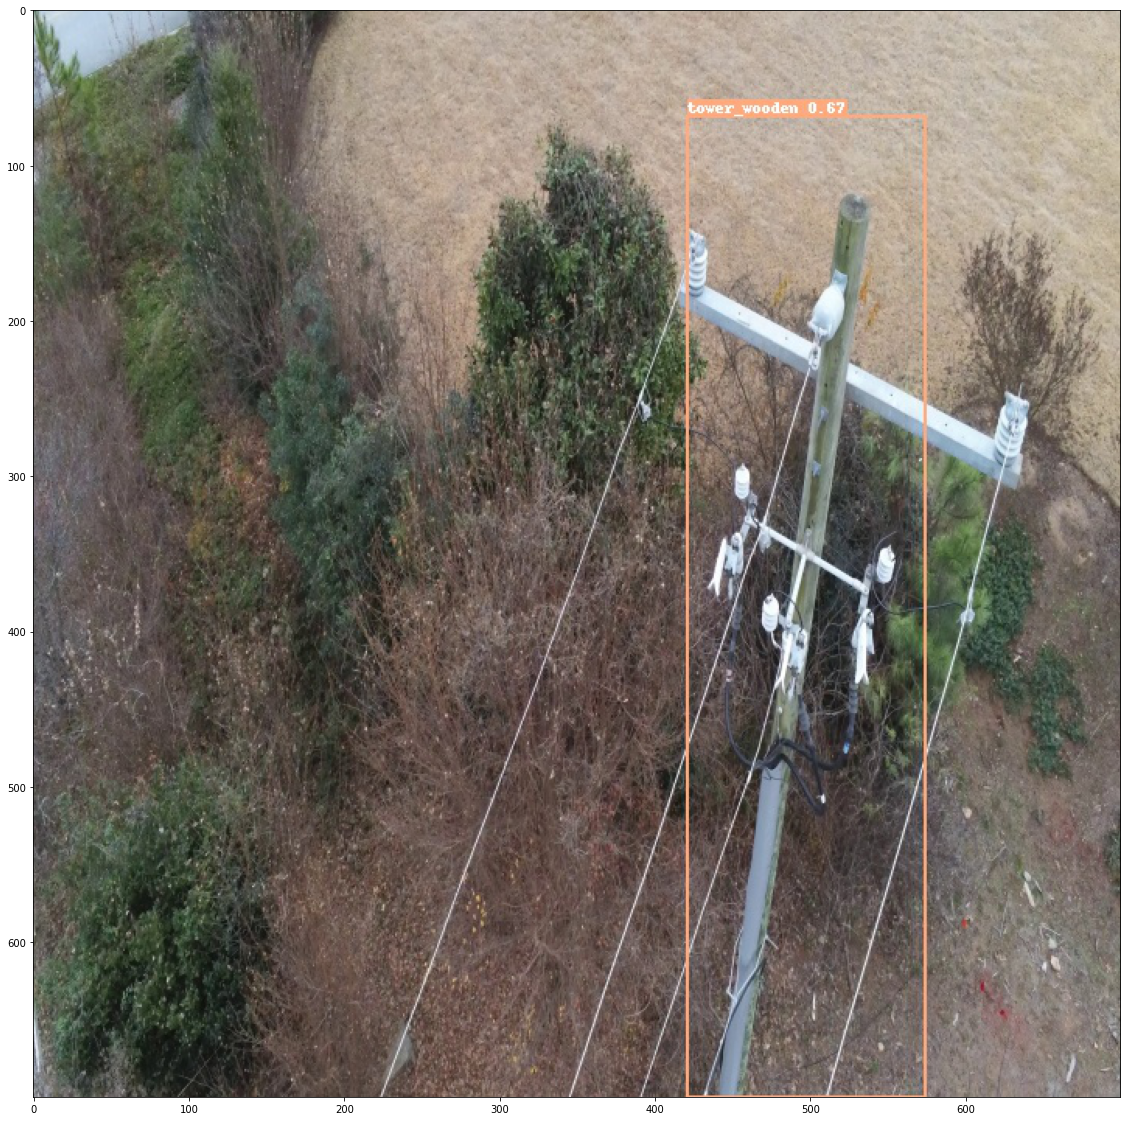

In [55]:
import matplotlib
import matplotlib.pyplot as plt
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 20)
im = plt.imread('/content/PaddleDetection/output/08_1830.jpg')
plt.imshow(im)